<a href="https://colab.research.google.com/github/shanikawm/Assessments/blob/main/Tissue_to_Tissue_co_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminary Research on Tissue to Tissue Gene Co-Expression across 68 Tissues


### Data File Used - Median gene-level TPM by tissue
###### GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Download the file

In [2]:
!wget https://storage.googleapis.com/adult-gtex/bulk-gex/v10/rna-seq/GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz

--2024-12-15 05:36:05--  https://storage.googleapis.com/adult-gtex/bulk-gex/v10/rna-seq/GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8846936 (8.4M) [application/octet-stream]
Saving to: ‘GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz’

GTEx_Analysis_v10_R 100%[===================>]   8.44M  34.6MB/s    in 0.2s    

2024-12-15 05:36:06 (34.6 MB/s) - ‘GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz’ saved [8846936/8846936]



View file header

In [3]:
!zcat GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz | head

#1.2
59033	68
Name	Description	Adipose_Subcutaneous	Adipose_Visceral_Omentum	Adrenal_Gland	Artery_Aorta	Artery_Coronary	Artery_Tibial	Bladder	Brain_Amygdala	Brain_Anterior_cingulate_cortex_BA24	Brain_Caudate_basal_ganglia	Brain_Cerebellar_Hemisphere	Brain_Cerebellum	Brain_Cortex	Brain_Frontal_Cortex_BA9	Brain_Hippocampus	Brain_Hypothalamus	Brain_Nucleus_accumbens_basal_ganglia	Brain_Putamen_basal_ganglia	Brain_Spinal_cord_cervical_c-1	Brain_Substantia_nigra	Breast_Mammary_Tissue	Cells_Cultured_fibroblasts	Cells_EBV-transformed_lymphocytes	Cervix_Ectocervix	Cervix_Endocervix	Colon_Sigmoid	Colon_Transverse	Colon_Transverse_Mixed_Cell	Colon_Transverse_Mucosa	Colon_Transverse_Muscularis	Esophagus_Gastroesophageal_Junction	Esophagus_Mucosa	Esophagus_Muscularis	Fallopian_Tube	Heart_Atrial_Appendage	Heart_Left_Ventricle	Kidney_Cortex	Kidney_Medulla	Liver	Liver_Hepatocyte	Liver_Mixed_Cell	Liver_Portal_Tract	Lung	Minor_Salivary_Gland	Muscle_Skeletal	Nerve_Tibial	Ovary	Pancreas	Pancreas_Acini	Pa

Load the file into a Pandas dataframe

In [4]:
df = pd.read_csv('GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz', sep="\t", compression="gzip", skiprows=2, index_col=1)

In [5]:
df

,Name,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,...,Spleen,Stomach,Stomach_Mixed_Cell,Stomach_Mucosa,Stomach_Muscularis,Testis,Thyroid,Uterus,Vagina,Whole_Blood
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,ENSG00000223972.5,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.167751,0.000000,0.000000,0.000000,0.00000
WASH7P,ENSG00000227232.5,3.99789,3.178150,2.673080,4.0708,3.87547,3.62625,5.05094,1.45902,1.72721,...,6.042590,3.041170,3.328970,2.87374,4.085680,4.542470,6.317910,7.068700,5.741870,2.89503
MIR6859-1,ENSG00000278267.1,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
MIR1302-2HG,ENSG00000243485.5,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.054907,0.000000,0.000000,0.000000,0.00000
FAM138A,ENSG00000237613.2,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,ENSG00000198695.2,3479.95000,3605.240000,6229.830000,5961.1400,5014.48000,4577.12000,8343.99000,8470.01000,7455.51000,...,5918.860000,9394.920000,11078.200000,12877.20000,17030.600000,1708.290000,2400.350000,3595.070000,2202.710000,1056.52000
MT-TE,ENSG00000210194.1,9.66208,8.599950,14.677800,18.6770,14.34600,14.35710,22.70730,21.15200,17.67660,...,21.565200,27.461000,32.890000,44.00160,53.812900,2.324410,4.455020,8.768250,4.251670,3.13967
MT-CYB,ENSG00000198727.2,23813.90000,25381.700000,28928.900000,13013.2000,16380.50000,13177.00000,23353.90000,32337.60000,27802.60000,...,12416.800000,27364.200000,22252.700000,31359.20000,26006.300000,15641.200000,19502.900000,15390.600000,12679.100000,2520.98000


We don't need the colums Name. Drop it

In [6]:
df.drop(columns=['Name'], inplace=True)

In [7]:
df

,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,...,Spleen,Stomach,Stomach_Mixed_Cell,Stomach_Mucosa,Stomach_Muscularis,Testis,Thyroid,Uterus,Vagina,Whole_Blood
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.167751,0.000000,0.000000,0.000000,0.00000
WASH7P,3.99789,3.178150,2.673080,4.0708,3.87547,3.62625,5.05094,1.45902,1.72721,1.603350,...,6.042590,3.041170,3.328970,2.87374,4.085680,4.542470,6.317910,7.068700,5.741870,2.89503
MIR6859-1,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
MIR1302-2HG,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.023691,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.054907,0.000000,0.000000,0.000000,0.00000
FAM138A,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,3479.95000,3605.240000,6229.830000,5961.1400,5014.48000,4577.12000,8343.99000,8470.01000,7455.51000,10951.400000,...,5918.860000,9394.920000,11078.200000,12877.20000,17030.600000,1708.290000,2400.350000,3595.070000,2202.710000,1056.52000
MT-TE,9.66208,8.599950,14.677800,18.6770,14.34600,14.35710,22.70730,21.15200,17.67660,25.462400,...,21.565200,27.461000,32.890000,44.00160,53.812900,2.324410,4.455020,8.768250,4.251670,3.13967
MT-CYB,23813.90000,25381.700000,28928.900000,13013.2000,16380.50000,13177.00000,23353.90000,32337.60000,27802.60000,40827.400000,...,12416.800000,27364.200000,22252.700000,31359.20000,26006.300000,15641.200000,19502.900000,15390.600000,12679.100000,2520.98000


We are interest on gene to gene co-relation across 68 tissues. So we nee the transpose of the data frame

In [8]:
df = df.transpose()

In [9]:
df

Description,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,ENSG00000238009,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
Adipose_Subcutaneous,0.000000,3.99789,0.0,0.000000,0.0,0.000000,0.031371,0.040547,0.055574,0.017653,...,30972.00,0.000000,0.000000,0.000000,4021.690,3479.95,9.66208,23813.90,0.000000,1.270030
Adipose_Visceral_Omentum,0.000000,3.17815,0.0,0.000000,0.0,0.000000,0.033268,0.036390,0.046406,0.037877,...,36355.10,0.445522,0.565277,0.446485,4678.280,3605.24,8.59995,25381.70,0.511427,1.083120
Adrenal_Gland,0.000000,2.67308,0.0,0.000000,0.0,0.035769,0.046475,0.053730,0.029899,0.015992,...,54447.00,1.273820,1.133100,1.432910,6370.830,6229.83,14.67780,28928.90,0.653953,1.496120
Artery_Aorta,0.000000,4.07080,0.0,0.000000,0.0,0.000000,0.027872,0.025192,0.025440,0.023735,...,15607.70,0.000000,0.000000,0.000000,4262.620,5961.14,18.67700,13013.20,0.000000,1.431700
Artery_Coronary,0.000000,3.87547,0.0,0.000000,0.0,0.000000,0.026830,0.035370,0.029107,0.021894,...,19951.20,0.000000,0.000000,0.000000,4503.990,5014.48,14.34600,16380.50,0.000000,1.495630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Testis,0.167751,4.54247,0.0,0.054907,0.0,0.000000,0.050638,0.033670,0.339970,0.282335,...,31304.50,0.000000,0.000000,0.000000,2670.880,1708.29,2.32441,15641.20,0.000000,0.923280
Thyroid,0.000000,6.31791,0.0,0.000000,0.0,0.000000,0.032269,0.039540,0.041325,0.057390,...,32181.80,0.000000,0.000000,0.000000,3484.650,2400.35,4.45502,19502.90,0.000000,0.891305
Uterus,0.000000,7.06870,0.0,0.000000,0.0,0.000000,0.032201,0.026106,0.045875,0.042955,...,23227.10,0.000000,0.000000,0.000000,3701.300,3595.07,8.76825,15390.60,0.000000,0.782832
Vagina,0.000000,5.74187,0.0,0.000000,0.0,0.000000,0.026682,0.027374,0.050278,0.073208,...,18632.50,0.000000,0.000000,0.000000,2715.940,2202.71,4.25167,12679.10,0.000000,0.714556


Filter the gene which has high variance across the Tissues. e.g. var > 100000.

**Here we will find Highly corellated gene in the same tiisue as we filter by very high variance across tissue.**

In [10]:
dff = df.loc[:, df.var(axis=0) > 1000000]

In [11]:
dff

Description,MTATP6P1,NPPA,CELA3B,CELA3A,SPRR3,S100A9,S100A8,RPS27,CRP,APOA2,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
Adipose_Subcutaneous,3103.950,3.15826,0.118047,0.439511,0.644210,172.4710,34.6495,3694.88,0.339827,0.169240,...,28069.1,20502.20,31841.10,35474.20,17477.30,14294.60,30972.00,4021.690,3479.95,23813.90
Adipose_Visceral_Omentum,3870.860,3.11594,0.255553,1.205380,1.010390,502.3630,115.7120,3189.21,0.252597,0.434164,...,31408.3,23423.50,37952.40,33957.70,22062.50,17312.20,36355.10,4678.280,3605.24,25381.70
Adrenal_Gland,5498.760,1.76894,0.883182,3.514100,1.726110,106.7780,23.6544,1700.18,0.378797,0.311769,...,50054.4,27743.90,51062.10,53834.60,22583.00,24751.50,54447.00,6370.830,6229.83,28928.90
Artery_Aorta,1795.250,3.05733,0.462118,1.980350,1.241790,148.8770,31.5614,3361.92,0.185794,0.253716,...,13598.3,10916.60,17946.70,16543.00,7902.96,6678.38,15607.70,4262.620,5961.14,13013.20
Artery_Coronary,2242.990,3.65336,0.340796,1.448790,1.166240,203.1930,36.9288,3193.86,0.276367,0.243703,...,20496.0,13628.40,22545.40,22398.60,13463.70,8771.35,19951.20,4503.990,5014.48,16380.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Testis,2772.480,11.13360,3.170790,3.575560,1.935110,16.5580,16.1430,1573.98,0.869846,1.071820,...,27240.9,16558.30,27603.90,35760.50,12693.70,14173.10,31304.50,2670.880,1708.29,15641.20
Thyroid,3014.750,3.56939,0.382649,1.549230,1.353790,101.8540,28.8038,3677.84,0.351241,0.225275,...,28951.6,19073.20,30192.60,36086.80,14739.30,14778.60,32181.80,3484.650,2400.35,19502.90
Uterus,2288.020,3.21015,1.147300,4.505260,2.444960,67.2258,19.6982,4737.75,0.451934,0.246204,...,18623.1,13825.30,22120.10,20188.00,10037.90,10488.60,23227.10,3701.300,3595.07,15390.60
Vagina,2002.740,3.83061,0.610725,2.671520,4340.970000,16451.5000,9047.0500,4141.04,0.359370,0.169997,...,20199.9,12214.50,19340.10,21477.50,9399.13,8484.97,18632.50,2715.940,2202.71,12679.10


Co-relation plot

In [12]:
dfc = dff.corr()

In [13]:
dfc

Description,MTATP6P1,NPPA,CELA3B,CELA3A,SPRR3,S100A9,S100A8,RPS27,CRP,APOA2,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
Description,,,,,,,,,,,,,,,,,,,,,
MTATP6P1,1.000000,0.198389,-0.286482,-0.291626,-0.171578,-0.319939,-0.266461,-0.476744,0.002959,0.045527,...,0.929257,0.959497,0.992837,0.910582,0.930450,0.932602,0.963091,0.828331,0.523766,0.952627
NPPA,0.198389,1.000000,-0.027513,-0.028291,-0.020579,-0.030112,-0.029162,-0.104618,-0.025232,-0.027327,...,0.029007,0.228455,0.198364,0.150081,0.222609,0.215207,0.158791,0.223179,0.089651,0.191649
CELA3B,-0.286482,-0.027513,1.000000,0.981427,-0.037600,-0.058040,-0.055880,-0.074474,-0.045358,-0.049472,...,-0.265375,-0.321731,-0.276934,-0.276310,-0.218266,-0.307158,-0.289844,-0.322311,-0.215134,-0.289841
CELA3A,-0.291626,-0.028291,0.981427,1.000000,-0.038680,-0.059710,-0.057490,-0.070259,-0.046583,-0.050828,...,-0.264762,-0.329129,-0.278737,-0.274116,-0.216720,-0.316931,-0.291030,-0.323566,-0.201787,-0.294921
SPRR3,-0.171578,-0.020579,-0.037600,-0.038680,1.000000,0.697071,0.910426,0.002862,-0.034539,-0.037403,...,-0.137473,-0.167168,-0.174928,-0.153516,-0.203540,-0.170534,-0.191319,-0.184911,-0.197314,-0.177536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,0.932602,0.215207,-0.307158,-0.316931,-0.170534,-0.344168,-0.273358,-0.477839,-0.066655,0.020876,...,0.849700,0.966460,0.937652,0.813563,0.858233,1.000000,0.958224,0.832505,0.447325,0.919658
MT-ND4,0.963091,0.158791,-0.289844,-0.291030,-0.191319,-0.369714,-0.304254,-0.451136,0.004296,0.080149,...,0.913091,0.950699,0.969247,0.905787,0.904050,0.958224,1.000000,0.825710,0.550576,0.935882
MT-ND5,0.828331,0.223179,-0.322311,-0.323566,-0.184911,-0.351477,-0.297013,-0.295950,-0.109705,-0.097060,...,0.788179,0.788687,0.811188,0.712218,0.718755,0.832505,0.825710,1.000000,0.802635,0.816265


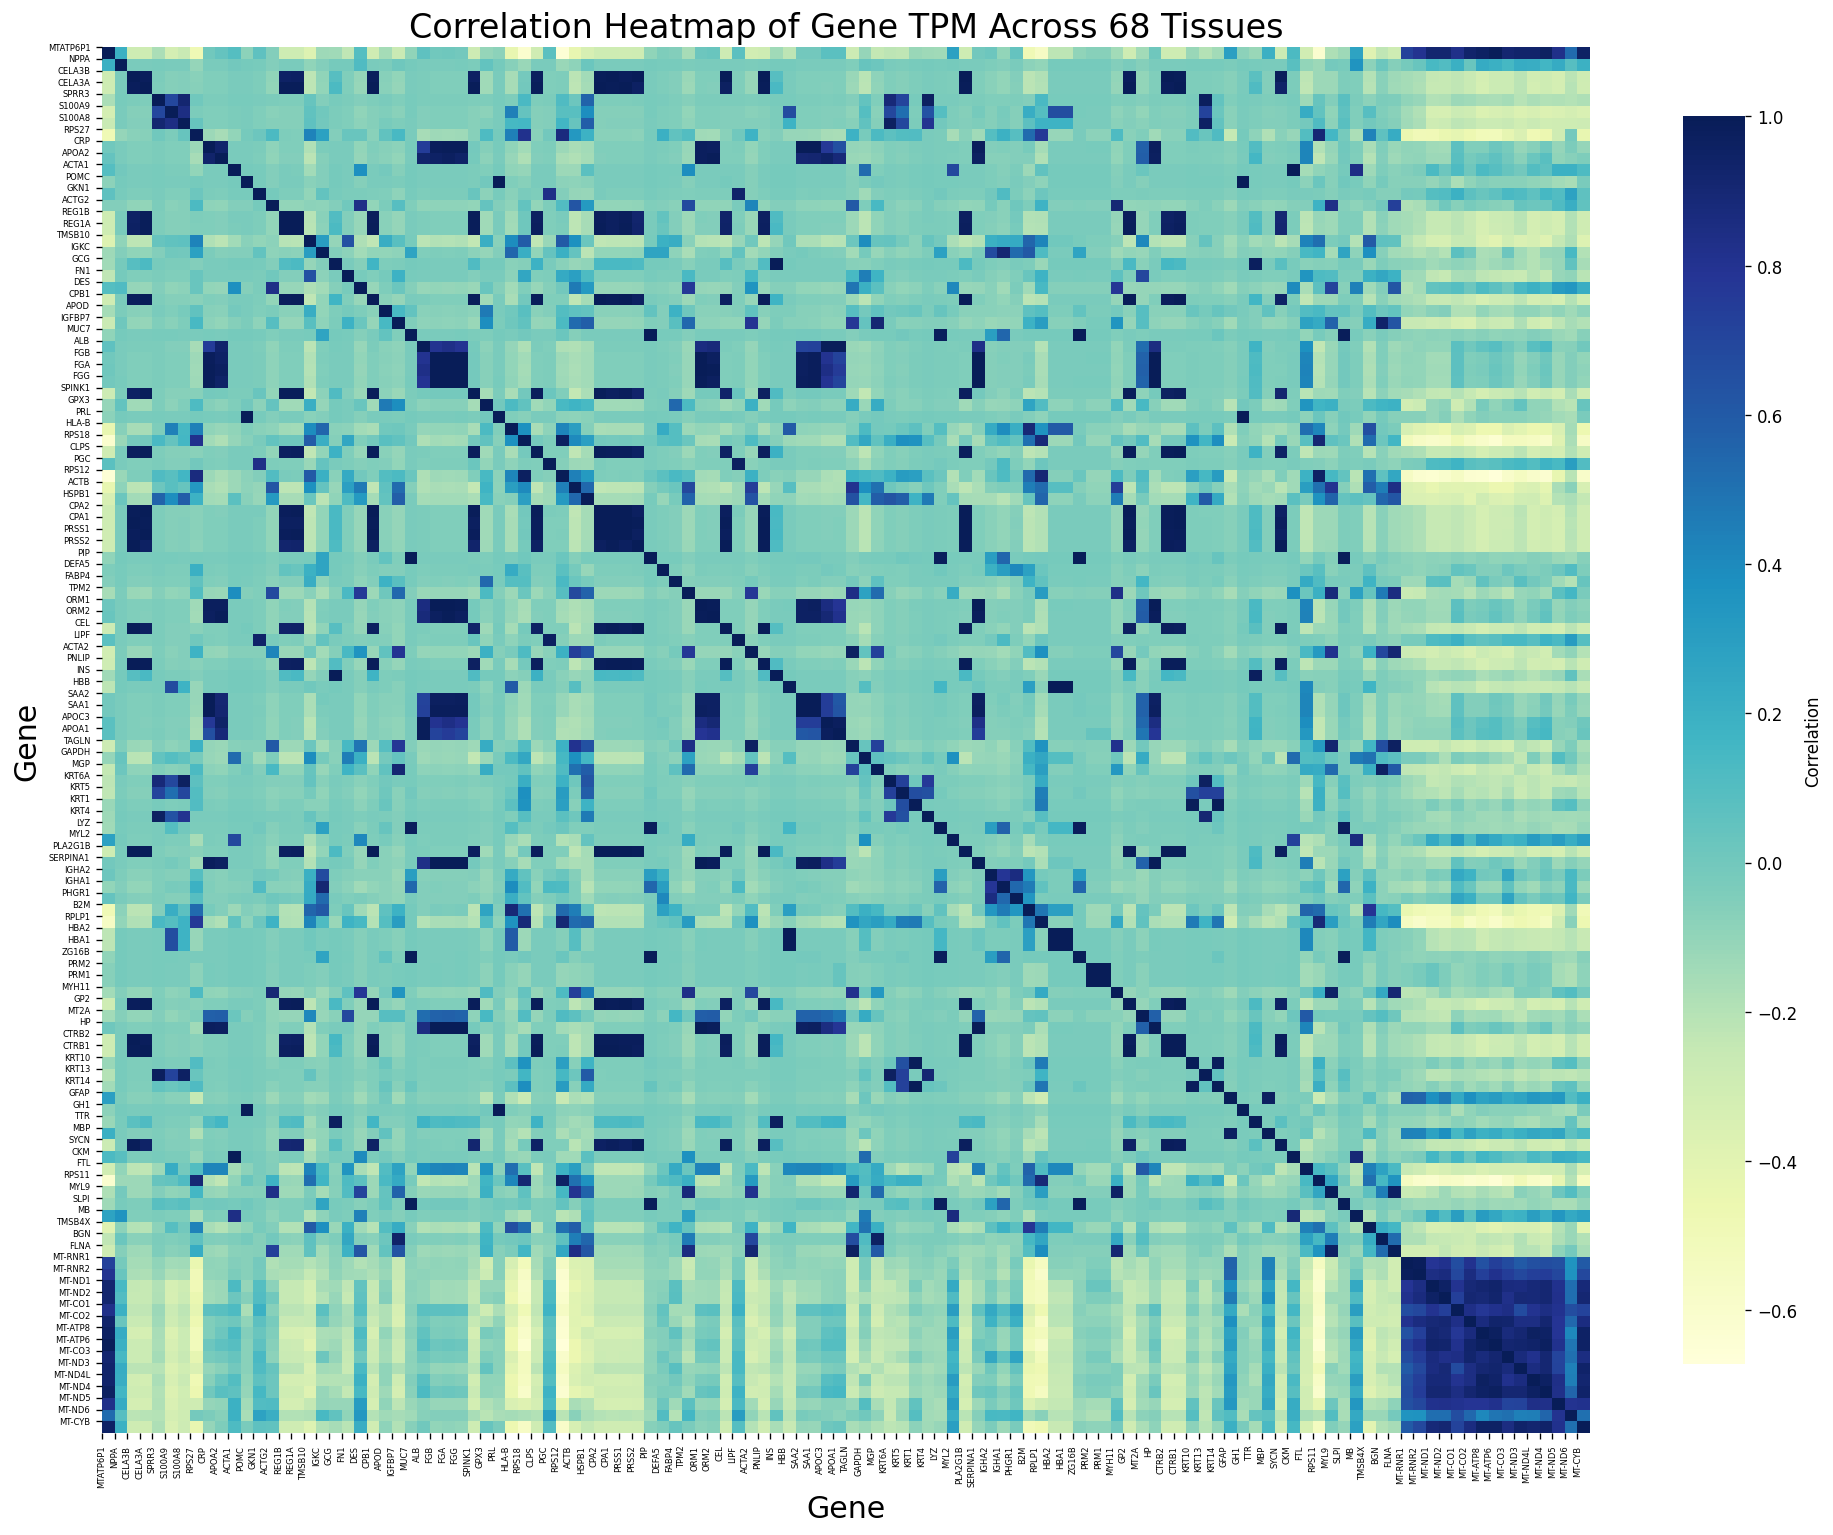

In [14]:
#mask = np.triu(np.ones_like(dfc))
fig, ax = plt.subplots(figsize=(20,15), dpi=120)
sn.heatmap(dfc, annot=False, cbar_kws={"shrink":.9, "label":"Correlation"}, cmap="YlGnBu")
ax.set_title("Correlation Heatmap of Gene TPM Across 68 Tissues",size=20)
ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)
ax.set_xlabel('Gene', fontsize=18)
ax.set_ylabel('Gene', fontsize=18)
ax.set_xticks(range(len(dfc.columns)))
ax.set_yticks(range(len(dfc.columns)))
ax.set_xticklabels(dfc.columns, rotation=90)
ax.set_yticklabels(dfc.columns)
plt.show()

#### Finding top 10 highly co-related genes across Tissues

In [15]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_bot_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

#### Top Absolute Correlations

In [16]:
print(get_top_correlations(dfc, 10))

Description  Description
PRM2         PRM1           1.000000
PRL          GH1            1.000000
HBB          HBA2           1.000000
POMC         PRL            0.999999
             GH1            0.999999
MUC7         ZG16B          0.999999
HBB          HBA1           0.999998
CPA1         PLA2G1B        0.999998
HBA2         HBA1           0.999997
CELA3A       GP2            0.999993
dtype: float64


### Let's check PRM2 and PRM1 Genes from GTEx portal whether they are in same tissue.

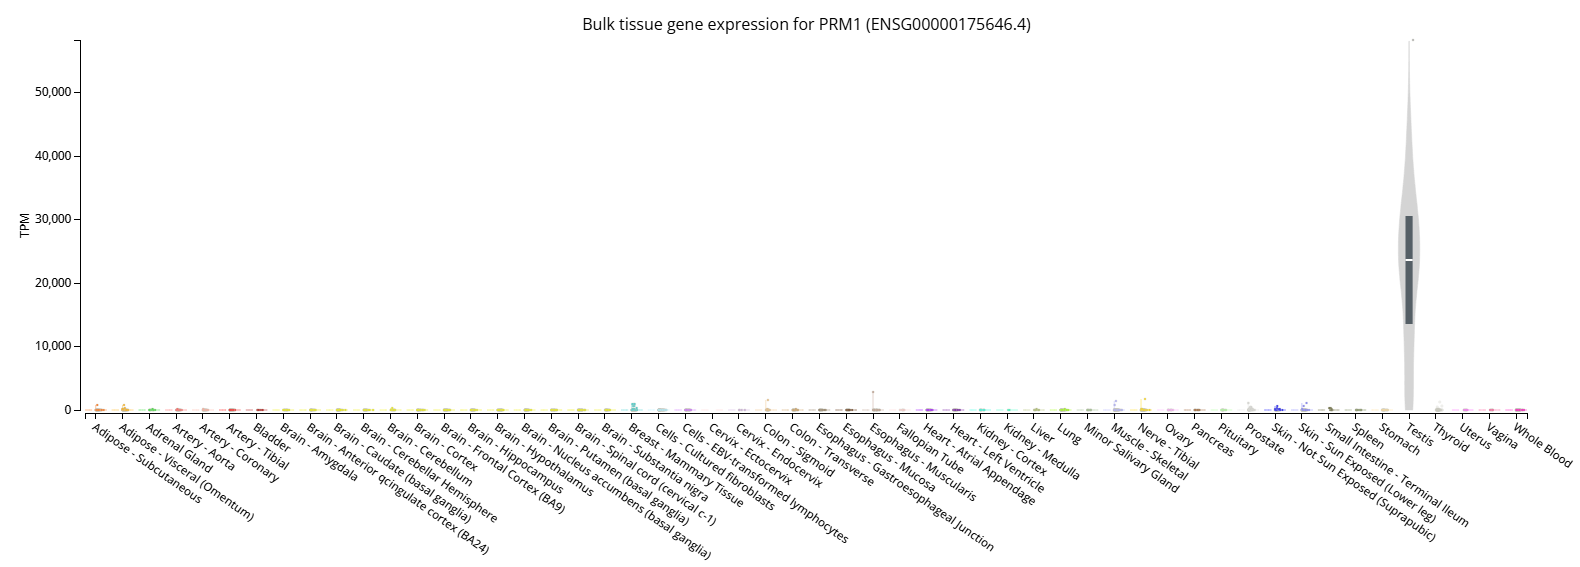

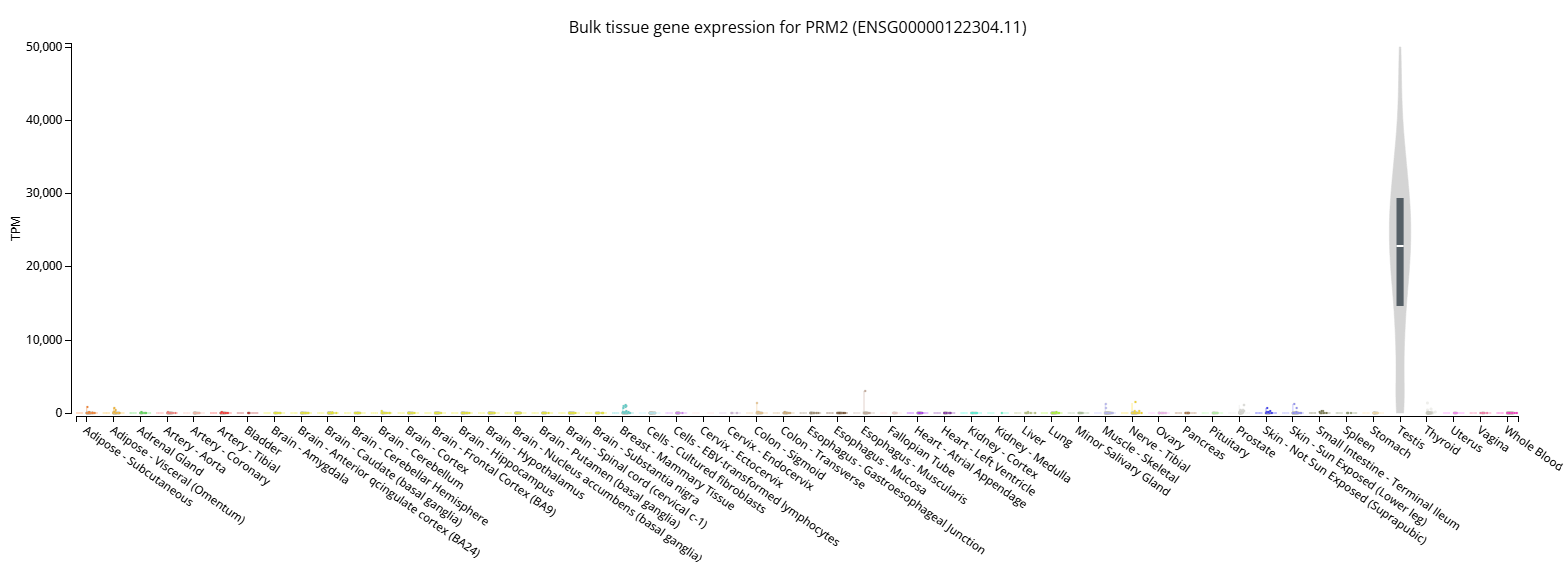

Both are in the same Tissue (Testis)

#### Bottom Absolute Correlations

In [17]:
print(get_bot_correlations(dfc, 10))

Description  Description
RPS12        MT-ATP6       -0.856599
             MT-RNR2       -0.851641
MTATP6P1     RPS12         -0.846305
RPS18        MT-ATP6       -0.841472
RPS12        MT-ND4        -0.837743
             MT-RNR1       -0.836895
MTATP6P1     RPS18         -0.831517
RPS12        MT-CO2        -0.829785
RPS18        MT-RNR2       -0.828418
RPS12        MT-ND1        -0.828339
dtype: float64


### Lets check RPS12 and MT-ATP6

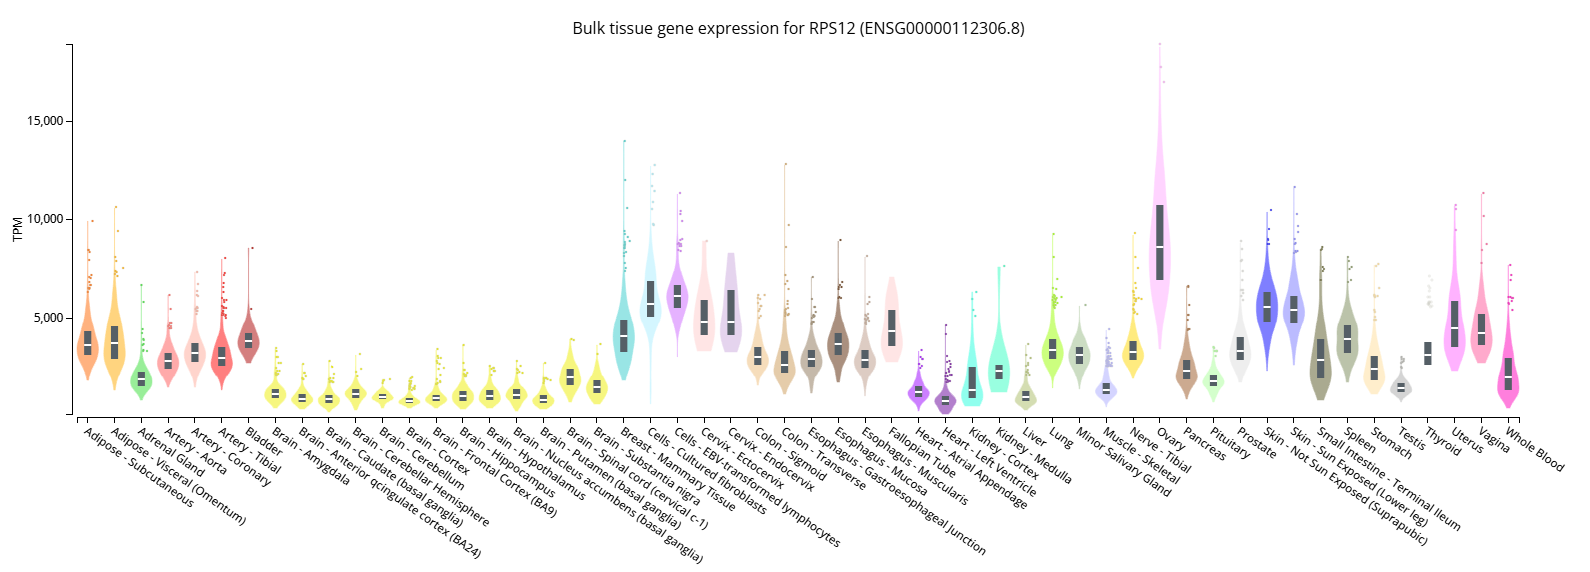

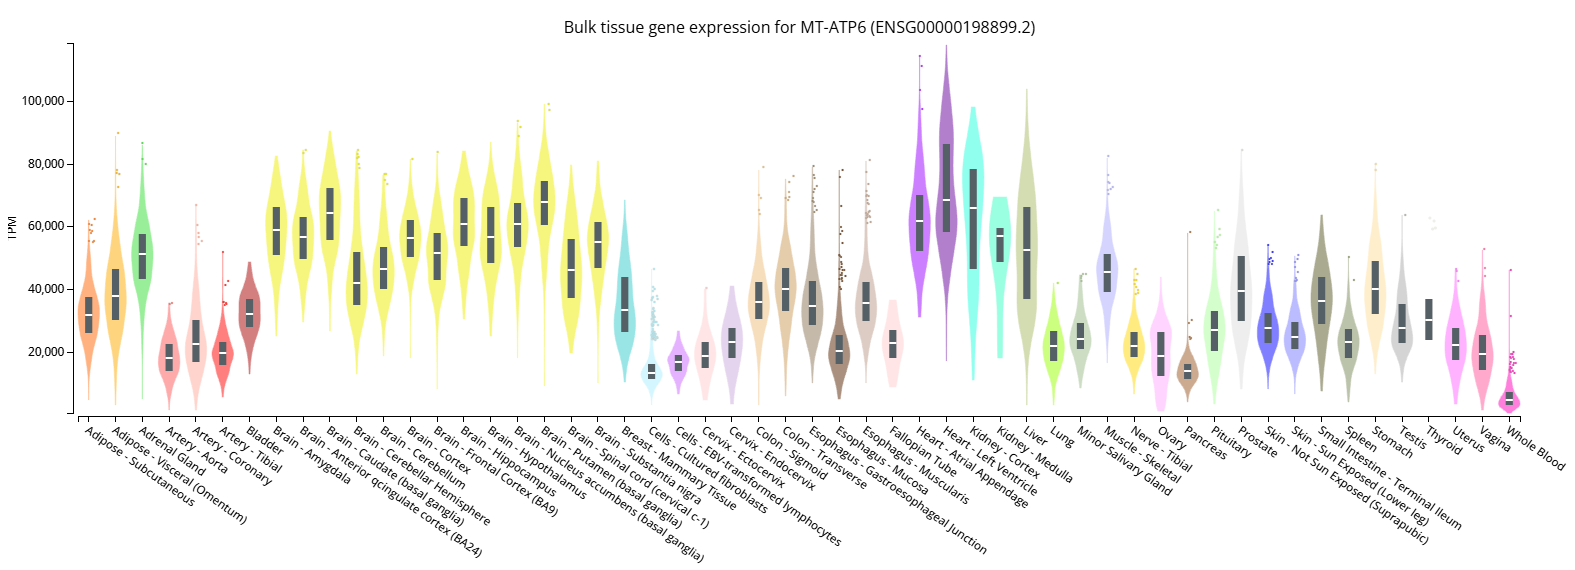

No co-relation can be observed

### Let's check for co-relation around 0 using absolute values

In [18]:
def get_bot_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]
print(get_bot_abs_correlations(dfc, 10))

Description  Description
MUC7         KRT1           0.000071
GCG          KRT13          0.000191
INS          KRT13          0.000322
LYZ          KRT10          0.000329
INS          LYZ            0.000347
ORM1         HBA1           0.000468
FGA          HBA1           0.000502
GAPDH        SLPI           0.000504
ORM1         HBA2           0.000558
FGA          HBA2           0.000585
dtype: float64


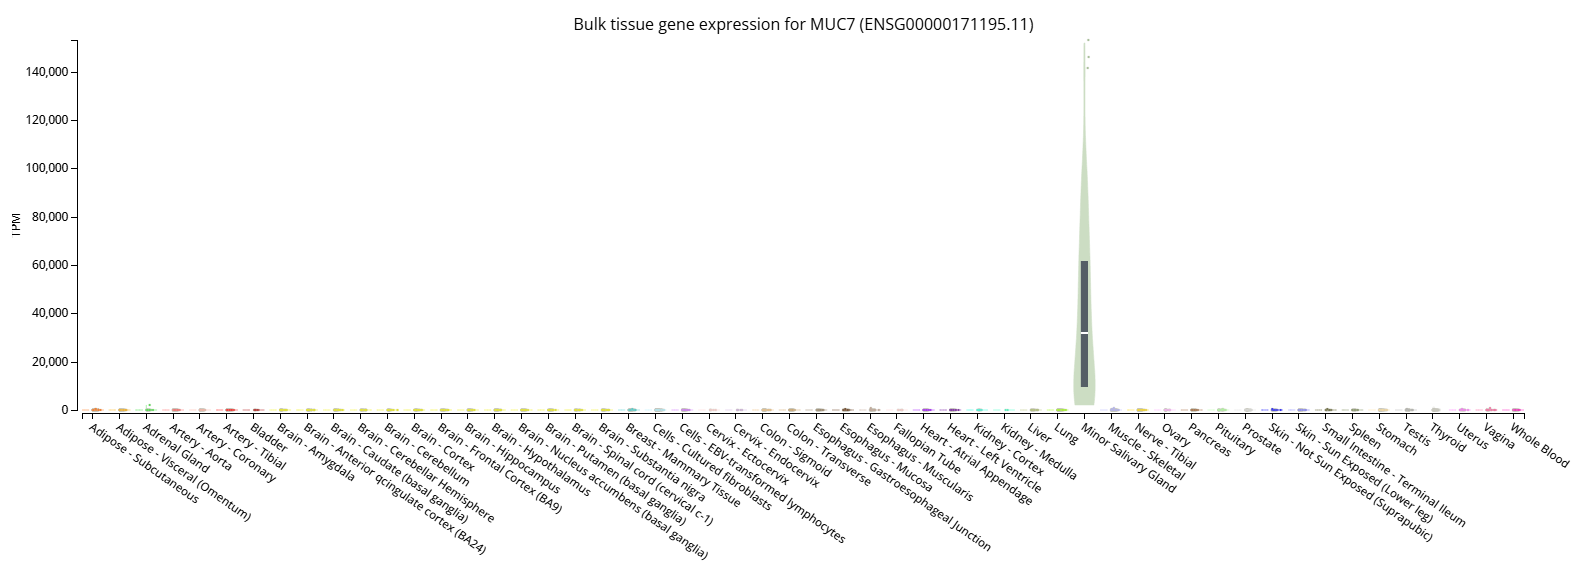

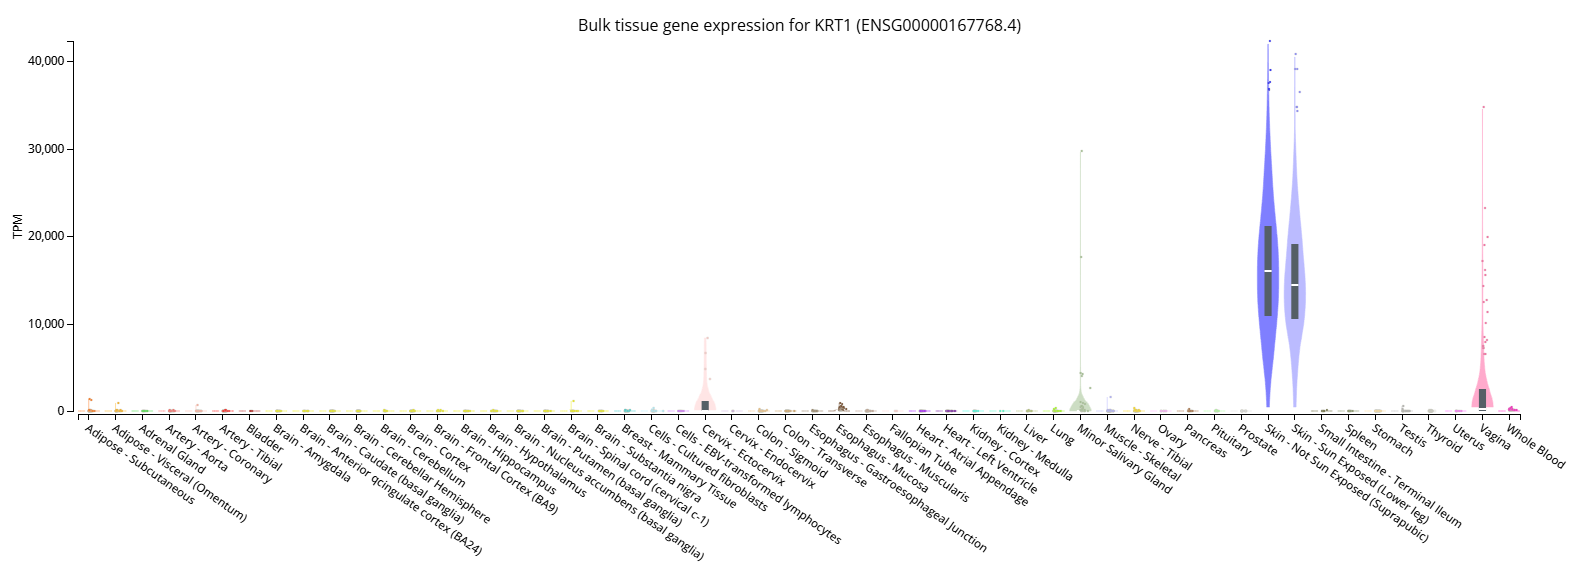

MUC7 is related to Salivary gland and KRT1 is mainly related to Skin and Vagina